# Settings

In [18]:
import numpy as np
import pandas as pd

import spacy
from spacy_langdetect import LanguageDetector

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

pd.set_option('max.colwidth', 500)

In [2]:
%reload_ext rpy2.ipython

# Scraping scripts

## Titles only

## Full article info

# Import data

In [3]:
titles = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_titles_2017.csv")

full = pd.read_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/raw/medium_full_2017.csv")

In [4]:
print("Full:", full.shape)
print("Titles:", titles.shape)

Full: (10549, 9)
Titles: (10887, 2)


# Clean URL in full article data table

In [5]:
full['articleLink'] = full['articleURL'].str.split('?').str[0]

full.drop('articleURL', axis=1, inplace=True)

full.drop_duplicates(subset=['articleLink'], keep='first', inplace=True)

print(full.shape)

(10501, 9)


# Clean URL in titles data table

In [6]:
titles['articleLink'] = titles['articleURL'].str.split('?').str[0]

titles.drop('articleURL', axis=1, inplace=True)

titles.drop_duplicates(subset=['articleLink'], keep='first', inplace=True)

print(titles.shape)

(10582, 2)


# Merge two data tables to get full set of links

In [7]:
merged = full.merge(titles, how='outer', left_on='articleLink', right_on='articleLink' )

merged.drop(['article_x', 'article_y'], axis=1, inplace=True)

# Analyze titles

## Parse URL slugs for title

In [8]:
## Remove NULLs in articleLink column 
merged.dropna(subset=['articleLink'], inplace=True)

In [19]:
for index, row in merged.iterrows():
    for link in row['articleLink'].split('/'):
        if '-' in link:
            words = link.split('-')[:-1]
            title = ' '.join(words)
            doc = nlp(title)
            if doc._.language['language'] == 'en':
                merged.loc[index, 'names'] = title

In [20]:
## Remove NULLs in parsed article title column 
merged.dropna(subset=['names'], inplace=True)

In [22]:
merged.head(20)

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,names
0,NaN,NaN,"Scientific Method,Scientist,Data Science",https://medium.com/@enienaber,enienaber,"Dec 31, 2016",,https://medium.com/@enienaber/hi-alias-db5f65d5e887,hi alias
1,NaN,NaN,"Product Management,Data Management,Big Data,Data Science,Master Data Management",https://medium.com/@Riversand,Riversand,"Jan 2, 2017",3 min read,https://medium.com/@Riversand/one-size-doesnt-fit-all-the-complexities-of-a-global-pim-a194198cea95,one size doesnt fit all the complexities of a global pim
2,NaN,NaN,"Business,Azure,Datascience,Rstats",https://medium.com/@sammydeprez,Sammy Deprez,"Jan 3, 2017",2 min read,https://medium.com/data-fish/why-investing-in-data-science-cd8251a205b,why investing in data science
3,NaN,NaN,"Data Science,Machine Learning,Recruiting,Tech,Social Media",https://medium.com/@asharma567567,Ajay Sharma,"Jan 3, 2017",6 min read,https://medium.com/@asharma567567/the-2016-summer-swoon-of-data-science-jobs-dcb5a515506b,the 2016 summer swoon of data science jobs
4,NaN,NaN,"Data Science,Big Data,Business Analytics Course,Business Analytics,Business Development",https://medium.com/@databrio9,Rahul Sen,"Jan 5, 2017",2 min read,https://medium.com/@databrio9/acquiring-r-training-holds-crucial-importance-for-data-scientists-14640d2dbd60,acquiring r training holds crucial importance for data scientists
5,1 clap,NaN,"Data Visualization,Data Science,Business Intelligence",https://medium.com/@sahil_patel,Sahil Patel,"Jan 5, 2017",2 min read,https://medium.com/@sahil_patel/visualize-business-success-with-smart-data-visualization-2c72fc8dd91d,visualize business success with smart data visualization
6,NaN,NaN,"Big Data,Data Science,Marketing,Analytics,Startup",https://medium.com/@gavriloandric,Gavrilo Andric,"Jan 7, 2017",4 min read,https://medium.com/@gavriloandric/aper-blog1-4d9c579ffaa9,aper blog1
7,NaN,NaN,"Big Data,Data Science,Personalization",https://medium.com/@DigitallyMani,Mani Gopalakrishnan,"Jan 7, 2017",3 min read,https://medium.com/@DigitallyMani/how-to-personalize-your-product-or-service-with-big-data-2202b7787239,how to personalize your product or service with big data
8,NaN,NaN,"R,Learning,Swirl,Data Science,Programming",https://medium.com/@jonmcalder,Jon Calder,"Jan 8, 2017",6 min read,https://medium.com/@jonmcalder/why-swirl-37d41afe80f9,why swirl
9,2 claps,NaN,"Big Data,Data Science",https://medium.com/@dhanashreepawar1234,Dhanashree Pawar,"Jan 9, 2017",3 min read,https://medium.com/@dhanashreepawar1234/big-data-market-to-gain-from-increased-usage-in-manufacturing-healthcare-applications-till-2025-db7eee2742f5,big data market to gain from increased usage in manufacturing healthcare applications till 2025


In [21]:
merged.to_csv("2017_data.csv", index=False)

## POS analysis

In [57]:
from textblob import TextBlob
from collections import Counter

def textblob_adj(text):
    blobed = TextBlob(text)
    counts = Counter(tag for word,tag in blobed.tags)
    
    adj_list = []
    adv_list = []
    noun_list = []
    pron_list = []
    verb_list = []
    
    adj_tag_list = ['JJ','JJR','JJS']
    adv_tag_list = ['RB','RBR','RBS','WRB']
    noun_tag_list = ['NN','NNS','NNP','NNPS']
    pron_tag_list = ['PRP','PRP$','WP','WP$']
    verb_tag_list = ['VB','VBD','VBG','VBN','VBP','VBZ']
        
    for (a, b) in blobed.tags:
        if b in adj_tag_list:
           adj_list.append(a)
        elif b in adv_tag_list:
           adv_list.append(a)
        elif b in noun_tag_list:
            noun_list.append(a)
        elif b in pron_tag_list:
            pron_list.append(a)
        elif b in verb_tag_list:
            verb_list.append(a)
        else:
            pass
        
    return adj_list, adv_list, noun_list, pron_list, verb_list, counts['JJ']+counts['JJR']+counts['JJS'],  counts['RB']+counts['RBR']+counts['RBS']


adj_list = []

adv_list = []

noun_list = []

pron_list = []

verb_list = []


for sent in merged["names"]:
    adj, adv, noun, pron, verb, adj_count, adv_count = textblob_adj(sent)
    
    if adj:
        adj_list.append(adj)
    else:
        pass
    
    
    if adv:
        adv_list.append(adv)
    else:
        pass
    
    
    if noun:
        noun_list.append(noun)
    else:
        pass
    
    if pron:
        pron_list.append(pron)
    else:
        pass
    
    if verb:
        verb_list.append(verb)
    else:
        pass

In [68]:
word_list = []

for x in adj_list:
    for y in x:
        word_list.append(y)
        
from collections import Counter
counts = Counter(word_list)
print(counts)

Counter({'big': 324, 'new': 193, 'deep': 136, 'artificial': 117, 'best': 111, 'top': 98, 'neural': 94, 'good': 86, 'real': 74, 'open': 71, 'social': 71, 'more': 70, 'first': 70, 'i': 69, 'simple': 68, 'linear': 59, 'digital': 53, 'statistical': 52, 'better': 52, 'ai': 52, 'predictive': 50, 'human': 46, 'next': 45, 'great': 44, 'basic': 37, 'last': 36, 'smart': 35, 'right': 34, 'python': 33, 'tutorial': 31, 'important': 31, 'weekly': 31, 'bayesian': 31, 'logistic': 30, 'online': 29, 'small': 29, 'data': 28, 'high': 28, 'curious': 27, 'free': 26, 'many': 26, 'quick': 26, 'effective': 26, 'un': 26, 'bad': 25, 'natural': 25, 'practical': 25, 'virtual': 25, 'different': 25, 'global': 24, 'multiple': 24, 'other': 24, 'daily': 23, 'visual': 23, 'tensorflow': 23, 'own': 23, 'easy': 22, 'public': 22, 'um': 22, 'non': 22, 'google': 21, 'common': 21, 'collaborative': 21, 'interesting': 20, 'technical': 20, 'little': 20, 'much': 20, 'few': 20, 'past': 19, 'wrong': 19, 'unsupervised': 19, 'successf

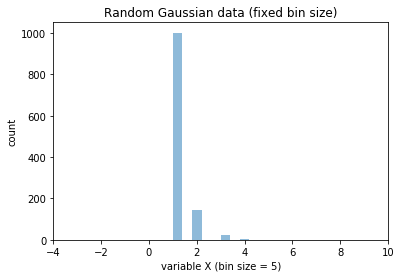

In [51]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = num_adv 

bins = 10

# fixed bin size
plt.xlim([min(data)-5, max(data)+5])


plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

## Title bigram relationships

### Get title bigrams counts 

In [28]:
import collections
import nltk

import spacy
from spacy_langdetect import LanguageDetector

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

counts = collections.Counter()

for sent in merged["names"]:
    doc = nlp(sent)
    test1 = []
    if doc._.language['language'] == 'en':
        for token in doc:
            if token.is_alpha:
                test1.append(token.text.lower())
    counts.update(nltk.bigrams(test1))

In [29]:
bigram_counts = pd.DataFrame.from_dict(counts, orient='index').reset_index()

bigram_counts.columns = ["Bigrams", 'Count']

bigram_counts[['Term1', 'Term2']] = pd.DataFrame(bigram_counts['Bigrams'].tolist(), index=bigram_counts.index)  

In [30]:
bigram_counts = bigram_counts[['Term1', 'Term2', 'Count']]

bigram_counts.columns = ['word1', 'word2', 'n']

bigram_counts.sort_values(by='n', ascending=False)

,word1,word2,n
14,data,science,820
115,machine,learning,601
34,how,to,348
42,big,data,207
18,of,data,191
59,a,data,172
431,of,the,154
94,data,scientist,153
374,in,the,141
195,the,data,126


In [31]:
bigram_counts.to_csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/processed/2017_title_bigram_counts.csv", index=False)

### Visualize bigram relationships

In [1]:
%reload_ext rpy2.ipython

In [6]:
%%R 

library(igraph)

bigram_counts <- read.csv("/Users/nancy/PycharmProjects/medium-ds-articles/data/processed/2017_title_bigram_counts.csv")

#bigram_counts <- head(bigram_counts[order(-bigram_counts$n),], 0.001*nrow(bigram_counts))

bigram_counts <- head(bigram_counts[order(-bigram_counts$n),], 60)

bigram_graph <- bigram_counts %>%
  graph_from_data_frame()

bigram_graph

IGRAPH 3d3aa4d DN-- 46 60 -- 
+ attr: name (v/c), n (e/n)
+ edges from 3d3aa4d (vertex names):
 [1] data        ->science      machine     ->learning    
 [3] how         ->to           big         ->data        
 [5] of          ->data         a           ->data        
 [7] of          ->the          data        ->scientist   
 [9] in          ->the          the         ->data        
[11] what        ->is           deep        ->learning    
[13] for         ->data         introduction->to          
[15] data        ->analysis     in          ->data        
+ ... omitted several edges


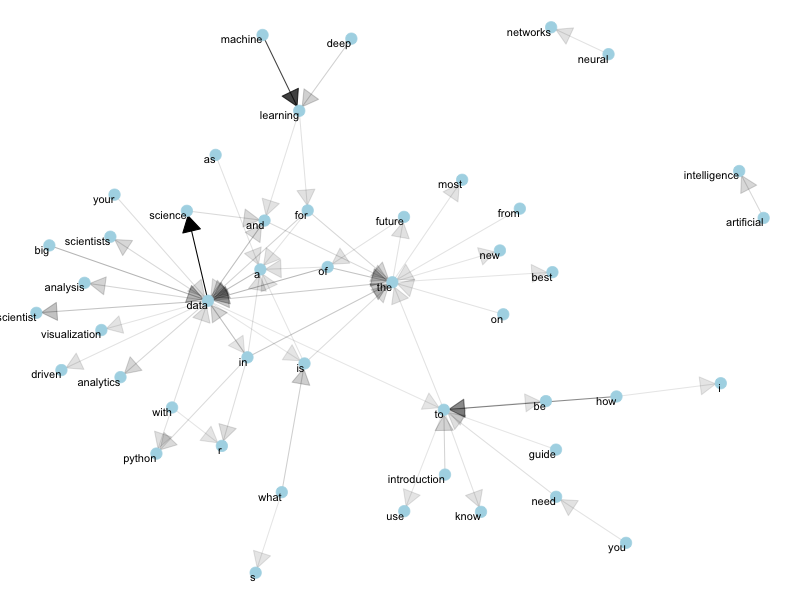

In [7]:
%%R -w 800 -h 600

library(ggraph)

set.seed(2016)

a <- grid::arrow(type = "closed")

options(repr.plot.width=12, repr.plot.height=8)
        
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                 arrow = a, end_cap = circle(.07, 'inches')) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()

# Association rule analysis of tags

In [23]:
urls_missing_tags = merged[merged['articleTags'].isnull()]

urls_missing_tags

,NumOfClaps,NumOfComments,articleTags,linkOfAuthorProfile,nameOfAuthor,postingTime,readingTime,articleLink,names
822,NaN,NaN,NaN,,NaN,NaN,,http://ww1.kfolds.com/what-is-data-science-459853ac2fed,what is data science
1908,NaN,NaN,NaN,,NaN,"Mar 10, 2017",,https://blog.datawrapper.de/introducing-scatter-plot/,introducing scatter
2121,NaN,NaN,NaN,,NaN,NaN,,http://ww17.kfolds.com/diving-into-gradient-descent-9404b6150965,diving into gradient descent
2163,NaN,NaN,NaN,,NaN,NaN,,http://ww1.kfolds.com/setting-up-a-data-science-environment-5e6fd1cbd572,setting up a data science environment
2814,NaN,NaN,NaN,,NaN,NaN,,http://ww1.kfolds.com/getting-oriented-in-ipython-notebooks-a96a124abe68,getting oriented in ipython notebooks
4061,NaN,NaN,NaN,,NaN,NaN,,https://aircloak.com/industry-insights/,industry
4762,NaN,NaN,NaN,,NaN,NaN,,https://www.avanade.com/en-au/blogs,en
5432,NaN,NaN,NaN,,NaN,"July 17, 2017",,https://blog.mightycause.com:443/using-data-to-drive-your-fundraising/,using data to drive your
5887,NaN,NaN,NaN,,NaN,NaN,,https://medium.com/@rautsan/do-you-want-to-hire-a-data-scientist-8c655f12c56,do you want to hire a data scientist
5897,NaN,NaN,NaN,,NaN,NaN,,http://ww1.kfolds.com/data-science-fundamentals-linear-regression-9b3bfb0c52bf,data science fundamentals linear regression


## Try to scrape links missing tags --> failed

In [24]:
tags = merged['articleTags'].str.split(',', expand=True)

tags = tags.fillna('')

In [25]:
tags.replace('Data Science', '', inplace=True)
tags.replace('Datascience', '', inplace=True)

In [26]:
tags.to_csv('2017_tags.csv', index=False)

In [27]:
%%R 

library(arules)

tr <- read.transactions("2017_tags.csv", format = 'basket', sep=',')

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘arules’


R[write to console]: The following objects are masked from ‘package:base’:

    abbreviate, write




In [28]:
%%R

summary(tr)

transactions as itemMatrix in sparse format with
 10597 rows (elements/itemsets/transactions) and
 4547 columns (items) and a density of 0.000723157 

most frequent items:
       Machine Learning                Big Data Artificial Intelligence 
                   3275                    1607                    1400 
     Data Visualization                  Python                 (Other) 
                   1028                     974                   26561 

element (itemset/transaction) length distribution:
sizes
   0    1    2    3    4    5    6 
 460  708 1003 1576 6848    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   3.288   4.000   6.000 

includes extended item information - examples:
           labels
1               0
2               1
3 100DayChallenge


In [29]:
%%R

itms <- itemFrequency(tr, type = "relative")
data.frame(sort(itms, decreasing = TRUE))

                          sort.itms..decreasing...TRUE.
Machine Learning                           3.090497e-01
Big Data                                   1.516467e-01
Artificial Intelligence                    1.321129e-01
Data Visualization                         9.700859e-02
Python                                     9.191281e-02
Data                                       7.794659e-02
Analytics                                  7.549306e-02
Data Analysis                              5.614797e-02
Deep Learning                              5.567613e-02
Statistics                                 4.463527e-02
Technology                                 3.982259e-02
Programming                                3.680287e-02
Startup                                    3.416061e-02
Tech                                       3.227328e-02
Towards Data Science                       3.066906e-02
AI                                         2.878173e-02
R                                          2.283

In [32]:
%%R

itemsets <- apriori(tr, parameter = list(supp=0.001, conf=0.8, target='frequent', minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.001      3
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4547 item(s), 10597 transaction(s)] done [0.02s].
sorting and recoding items ... [390 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [122 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [33]:
%%R

quality(itemsets)$lift <- interestMeasure(itemsets, measure='lift', tr)

inspect(sort(itemsets, by ='count', decreasing = T))

      items                          support count         lift
[1]   {Artificial Intelligence,                                
       Deep Learning,                                          
       Machine Learning}         0.024252147   257 1.066861e+01
[2]   {Artificial Intelligence,                                
       Big Data,                                               
       Machine Learning}         0.012833821   136 2.072763e+00
[3]   {AI,                                                     
       Artificial Intelligence,                                
       Machine Learning}         0.008776069    93 7.468092e+00
[4]   {Deep Learning,                                          
       Machine Learning,                                       
       Neural Networks}          0.006133811    65 2.605241e+01
[5]   {Artificial Intelligence,                                
       Machine Learning,                                       
       Technology}               0.00585